# Data Vis: Plotting Time Series Data
* Notebook 1: Smoothing and Trends

## Setup

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from IPython.display import HTML


# Data

In this notebook, we will use a private dataset about (solar) power generation and use of a single family house in Germany. The dataset contains the following columns:
- `timestamp`: The date and time of the measurement. The data is recorded every 1 hour.
- `total_consumption_kw`: The amount of power consumed per hour in kilowatts.
- `from_grid_kw`: The amount of power provided from the grid per hour in kilowatts.
- `from_pv_kw`: The amount of power generated by the solar panels per hour in kilowatts.
- `from_battery_kw`: The amount of power provided by the battery per hour in kilowatts.
- `to_grid_kw`: The amount of power provided to the grid per hour in kilowatts.
- `to_battery_kw`: The amount of power provided to the battery per hour in kilowatts.
- `battery_percent`: The average percentage of battery charge at the time of measurement.
- `battery_kwh`: The average amount of power in the battery at the time of measurement in kilowatt hours.
- various weather data, including temperature, humidity, precipitation, wind speed, and solar radiation (ghi, dni, dhi).

In [2]:
data = pd.read_csv("solar.csv")

In [3]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [4]:
data["year"] = data["timestamp"].dt.year
data["month"] = data["timestamp"].dt.month_name()
data["day"] = data["timestamp"].dt.day
data["hour"] = data["timestamp"].dt.hour
data["weekday"] = data["timestamp"].dt.day_name()
data["is_weekend"] = np.where(data["weekday"].isin(["Saturday", "Sunday"]), 1, 0)   

In [5]:
data.set_index("timestamp", inplace=True)

In [6]:
data.head()

,total_consumption_kw,from_grid_kw,from_pv_kw,from_battery_kw,to_grid_kw,to_battery_kw,battery_percent,battery_kwh,checksum,temperature_2m,...,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,year,month,day,hour,weekday,is_weekend
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-05-01 00:00:00+00:00,0.135,0.0,0.0,0.135,0.0,0.0,0.726,3.7026,0.0,14.962999,...,0.0,0.0,100.0,0.001960,2024,May,1,0,Wednesday,0
2024-05-01 01:00:00+00:00,0.132,0.0,0.0,0.132,0.0,0.0,0.684,3.4884,0.0,14.962999,...,0.0,16.0,90.0,0.010369,2024,May,1,1,Wednesday,0
2024-05-01 02:00:00+00:00,0.133,0.0,0.0,0.133,0.0,0.0,0.642,3.2742,0.0,15.263000,...,0.0,13.0,76.0,0.015774,2024,May,1,2,Wednesday,0
2024-05-01 03:00:00+00:00,0.093,0.0,0.0,0.093,0.0,0.0,0.610,3.1110,0.0,14.212999,...,0.0,21.0,0.0,0.006033,2024,May,1,3,Wednesday,0
2024-05-01 04:00:00+00:00,0.087,0.0,0.0,0.087,0.0,0.0,0.578,2.9478,0.0,12.763000,...,0.0,39.0,0.0,0.000000,2024,May,1,4,Wednesday,0


# Animation

Animation is a powerful tool for visualizing time series data. It allows us to see how the data changes over time, making it easier to identify trends and patterns. In this notebook, we will create an animated plot of solar power generation over time.

Let's first start with a static plot of the data.

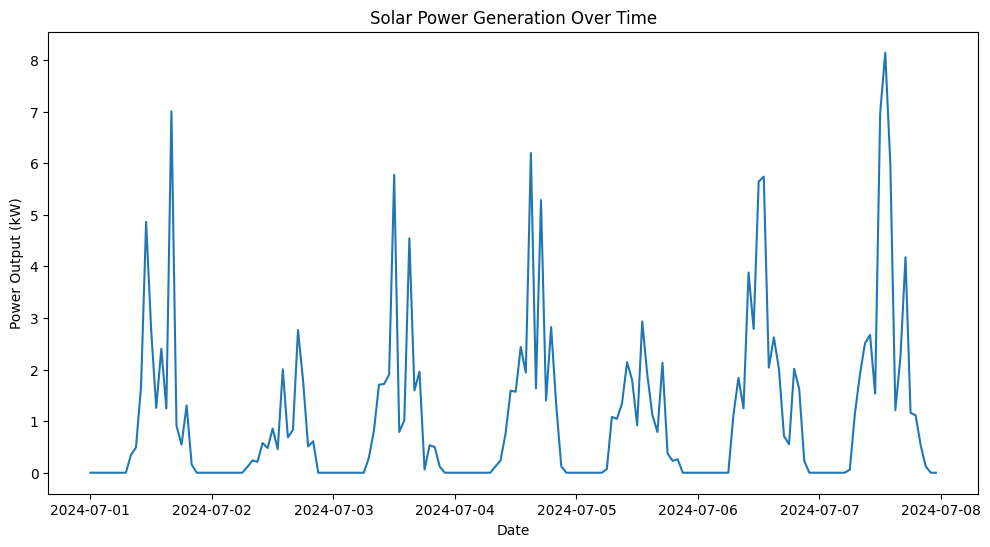

In [7]:
data_1week = data["2024-07-01":"2024-07-07"]

plt.figure(figsize=(12, 6))
sns.lineplot(data=data_1week, x=data_1week.index, y="from_pv_kw")
plt.title("Solar Power Generation Over Time")
plt.xlabel("Date")
plt.ylabel("Power Output (kW)")
plt.show()

Now, let's turn this into an animated plot. We will use the `FuncAnimation` function to create the animation. It takes a custom function `animate()` that updates the plot for each frame of the animation, as well as the number of frames and the interval between frames.

To avoid a constant resizing of the plot, we will set the x and y limits of the plot to the minimum and maximum values of the data. This will ensure that the plot does not resize during the animation.

In [ ]:
#...